# Redes Complexas: manipulação de grafos e conceitos fundamentais


In [1]:
#!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Criando um grafo.

In [26]:
G = nx.Graph()

# Adicionando vértices
G.add_node('Node1')
G.add_node('Node2')
G.add_node('Node3')
G.add_node('Node4')
G.add_node('Node5')
G.add_node('Node6')

# Adicionando arestas
G.add_edge('Node1', 'Node2')
G.add_edge('Node2', 'Node3')
G.add_edge('Node1', 'Node3')
G.add_edge('Node2', 'Node4')
G.add_edge('Node3', 'Node5')
G.add_edge('Node5', 'Node6')

Visualizando o grafo:

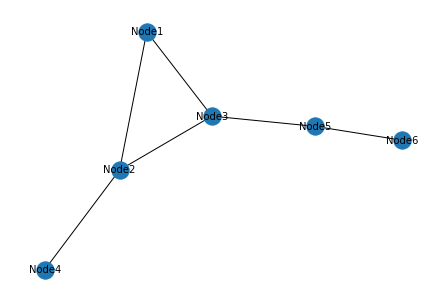

In [27]:

pos = nx.spring_layout(G)

nx.draw(G, with_labels = True, node_size=300, font_size=10, pos = pos)

plt.show()

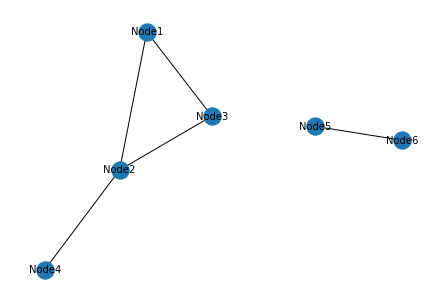

In [28]:
#Removendo aresta entre vértice 5 e vértice 3
G.remove_edge('Node5', 'Node3')

nx.draw(G, with_labels = True, node_size=300, font_size=10, pos = pos)
plt.show()

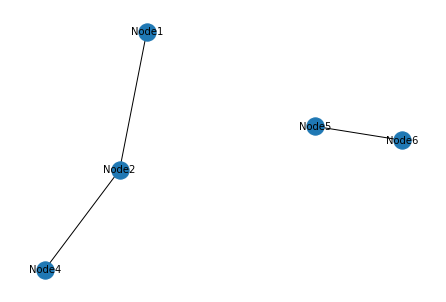

In [29]:
#Removendo vértice 3
G.remove_node('Node3')

nx.draw(G, with_labels = True, node_size=300, font_size=10, pos = pos)
plt.show()

OBS: removendo o vértice, suas arestas também são removidas.

#### Grafos ponderados

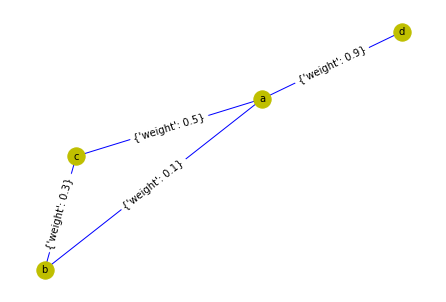

In [30]:
Gw = nx.Graph()

Gw.add_edge('a', 'b', weight=0.1)
Gw.add_edge('a', 'c', weight=0.5)
Gw.add_edge('b', 'c', weight=0.3)
Gw.add_edge('a', 'd', weight=0.9)

posw = nx.spring_layout(Gw)
nx.draw(Gw, with_labels = True, node_size=300, font_size=10, pos = posw, node_color="y", edge_color="b")
nx.draw_networkx_edge_labels(Gw, posw)
plt.show()

### Matrizes de adjacências e lista de conexões

Podemos criar o grafo a partir de uma matriz de adjacências ou por uma lista de adjacências.

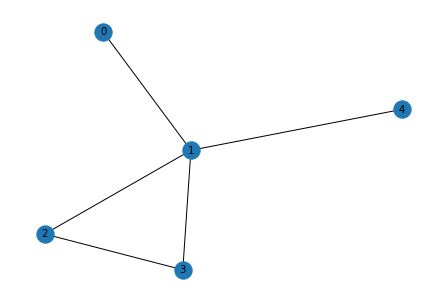

In [38]:
#MATRIZ DE ADJACÊNCIAS

A = np.array([[0,1,0,0,0],[1,0,1,1,1],[0,1,0,1,0],[0,1,0,0,0],[0,1,0,0,0]])

G = nx.from_numpy_matrix(np.array(A))
pos = nx.spring_layout(G)

nx.draw(G, with_labels = True, node_size=300, font_size=10, pos = pos)
plt.show()

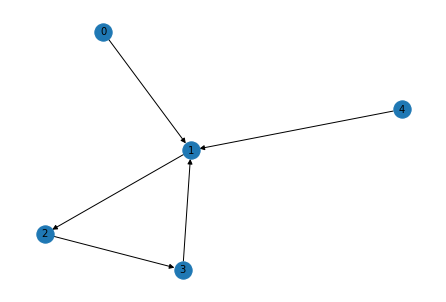

In [41]:
G.clear() #limpa o grafo

#LISTA DE ADJACÊNCIAS
edgelist=[(0,1),(1,2),(2,3),(3,1), (4,1)]

G = nx.DiGraph(edgelist) #DiGraph é utilizado para grafos dirigidos

nx.draw(G, with_labels = True, node_size=300, font_size=10, pos = pos)
plt.show()

### Acesso

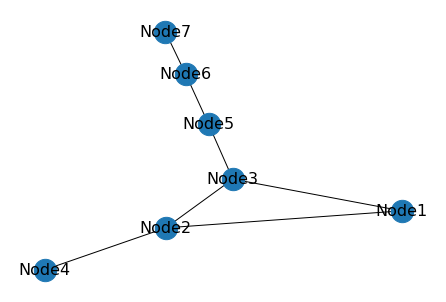

In [61]:
G = nx.Graph()
G.add_node('Node1')
G.add_node('Node2')
G.add_node('Node3')
G.add_node('Node4')
G.add_node('Node5')
G.add_node('Node6')
G.add_edge('Node1','Node2', time = '10pm') #time é uma informação da aresta
G.add_edge('Node2','Node3')
G.add_edge('Node1','Node3')
G.add_edge('Node2','Node4')
G.add_edge('Node3','Node5')
G.add_edge('Node5','Node6')

G.add_node('Node7', time='5pm')
G.add_edge('Node7','Node6')
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

In [62]:
# Acessando um vértice
n_i = 7
print("Node",str(i)+":",G.nodes['Node7']) # Python dictionary

# Acessando uma aresta
print(G.edges['Node1','Node2']) # Python dictionary

Node 7: {'time': '5pm'}
{'time': '10pm'}


Podemos converter todas as labels para inteiro, caso necessário.

In [63]:
# Mostrando todos os vértices
for node in G.nodes():
      print('Node:', node)

Node: Node1
Node: Node2
Node: Node3
Node: Node4
Node: Node5
Node: Node6
Node: Node7


In [64]:
# Mudando todos os vértices para números inteiros
G = nx.convert_node_labels_to_integers(G, first_label=0)
for node in G.nodes():
      print('Node:', node)

Node: 0
Node: 1
Node: 2
Node: 3
Node: 4
Node: 5
Node: 6


In [65]:
# Acessando as arestas
for n1 in G.edges(data=True):
      print(n1)

print()
# Atribuindo peso às arestas
for edge in G.edges():
    G[edge[0]][edge[1]]['weight'] = 1.5
# Printing
for n1 in G.edges(data = True):
    print(n1)

(0, 1, {'time': '10pm'})
(0, 2, {})
(1, 2, {})
(1, 3, {})
(2, 4, {})
(4, 5, {})
(5, 6, {})

(0, 1, {'time': '10pm', 'weight': 1.5})
(0, 2, {'weight': 1.5})
(1, 2, {'weight': 1.5})
(1, 3, {'weight': 1.5})
(2, 4, {'weight': 1.5})
(4, 5, {'weight': 1.5})
(5, 6, {'weight': 1.5})


### Operadores para grafos

In [66]:
G.clear()
print(G.nodes())
print(G.edges)

[]
[]


Vamos selecionar um subgrafo da rede do clube the Karate de Zachary. Notem que 'node test' não aparece no grafo, porque esse vértice não existe.

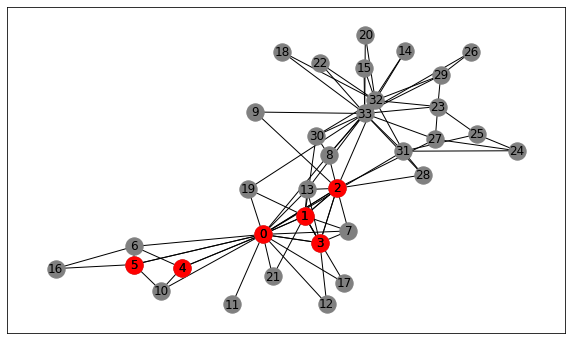

In [68]:
G = nx.karate_club_graph()
subset = [0,1,2,3,4,5, 'node test'] # a set of nodes
pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(subset) #Cria um subgrafo

plt.figure(figsize=(10,6))
nx.draw_networkx(G, pos=pos, node_color = 'gray')
nx.draw_networkx(k, pos=pos, node_color = 'red')
plt.show(True)

#### Juntando dois grafos
O comando **disjoint_union** assume que todos os vértices são diferentes.

Vamos criar dois grafos:

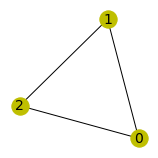

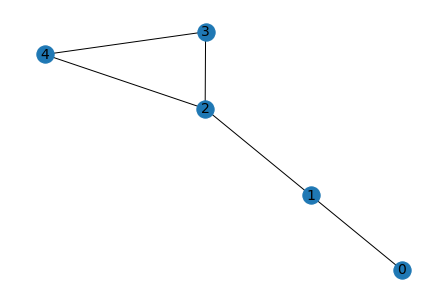

In [84]:
plt.figure(figsize=(2,2))

G0 = nx.Graph([(0,1),(1,2),(2,0)])

nx.draw(G0, with_labels = True, node_size=300, font_size=14, node_color='y')
plt.show()

G1 = nx.Graph([(0,1), (1,2), (2,3), (3,4), (2,4)])
nx.draw(G1, with_labels = True, node_size=300, font_size=14)
plt.show()

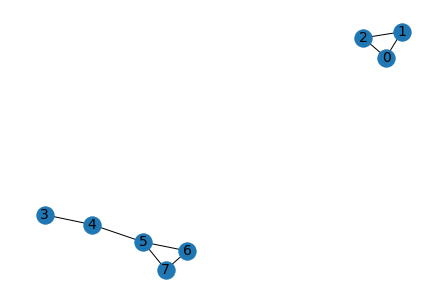

In [85]:
#Unindo os grafos com disjoint_union
G2 = nx.disjoint_union(G0, G1)
nx.draw(G2, with_labels = True, node_size=300, font_size=14)
plt.show()

Os grafos foram unidos, mas não estão conexos. Isto é propriedade do **disjoint union**

Utilizando **compose**:

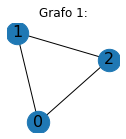

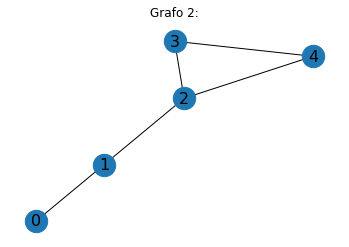

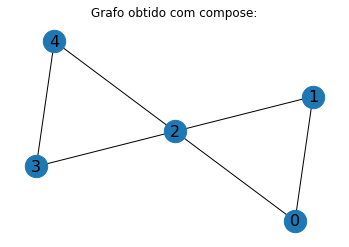

In [83]:
plt.figure(figsize=(2,2))
G1 = nx.Graph([(0,1),(1,2),(2,0)])
plt.title('Grafo 1:')
nx.draw(G1, with_labels = True, node_size=500, font_size=16)
plt.show()

G2 = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4)])
plt.title('Grafo 2:')
nx.draw(G2, with_labels = True, node_size=500, font_size=16)
plt.show()

G3 = nx.compose(G1, G2)
plt.title("Grafo obtido com compose:")
nx.draw(G3, with_labels = True, node_size=500, font_size=16)
plt.show()

#### Conversão
Transformando um **dígrafo** em um grafo não dirigido

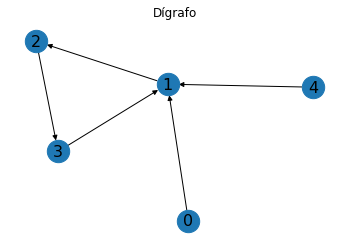

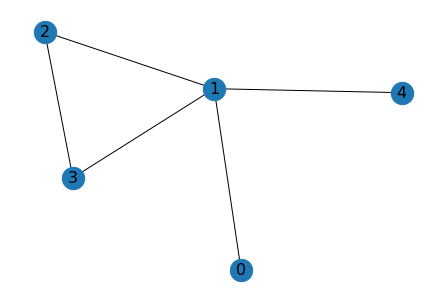

In [86]:
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.DiGraph(edgelist)
pos=nx.spring_layout(G)
plt.title('Dígrafo')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

# Tirando a direção do grafo
G = G.to_undirected()
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

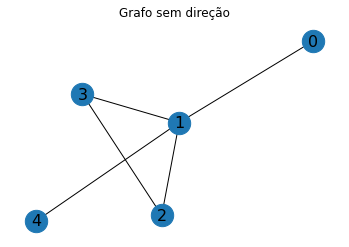

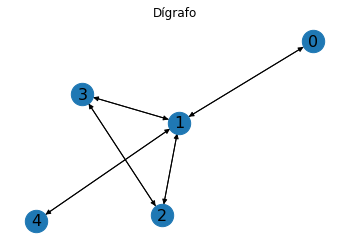

In [87]:
# Fazendo o contrário
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.Graph(edgelist)
pos=nx.spring_layout(G)
plt.title('Grafo sem direção')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

# Convertendo um grafo sem direção para um dígrafo
G = G.to_directed()
plt.title('Dígrafo')
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

Convertendo um grafo **ponderado** em um grafo **não ponderado**

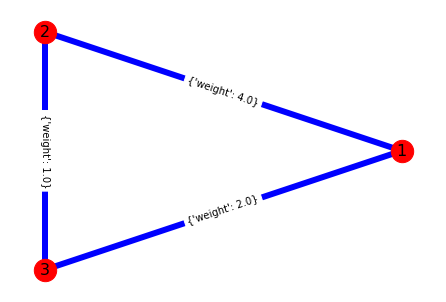

In [88]:
G1.clear()
G1 = nx.Graph()
G1.add_edge(1, 2, weight=4.0 )
G1.add_edge(1, 3, weight=2.0 )
G1.add_edge(2, 3, weight=1.0 )
labels = G1.nodes()
pos=nx.circular_layout(G1)
nx.draw(G1, with_labels = True, node_color='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# use default edge labels
nx.draw_networkx_edge_labels(G1,pos)
plt.show(True)

ERROR! Session/line number was not unique in database. History logging moved to new session 68


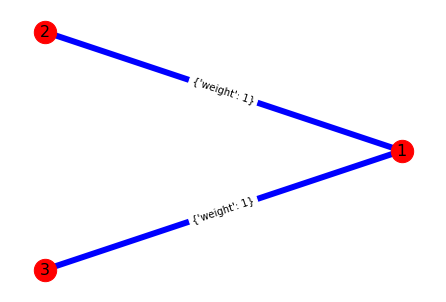

In [97]:
# Precisamos definir um limiar
min_weight = 1.0

Gnew = nx.Graph()

for (u, v, w) in G1.edges(data=True):
    if w['weight'] > min_weight:
        Gnew.add_edge(u, v, weight=1)
        
        
labels = Gnew.nodes()
nx.draw(Gnew, with_labels = True, node_color='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6)   # default spring_layout
# use default edge labels
nx.draw_networkx_edge_labels(Gnew,pos)
plt.show(True)

### Leitura e escrita

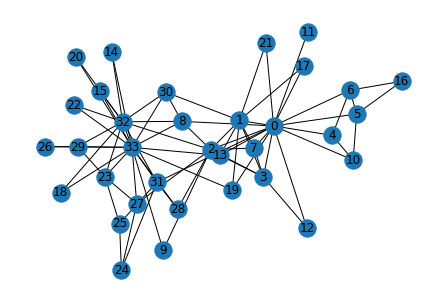

In [2]:
G=nx.karate_club_graph()
nx.draw(G, with_labels = True)
plt.show(True)

# Escreve o grafo no arquivo zachary.txt
nx.write_edgelist(G, "zachary.txt")

ERROR! Session/line number was not unique in database. History logging moved to new session 72


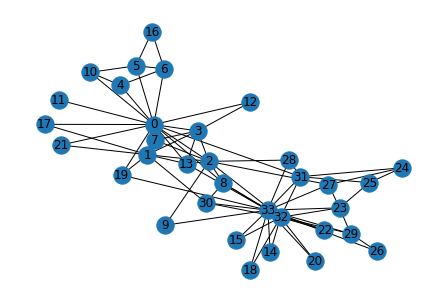

In [3]:
# Lendo o arquivo
G1 = nx.read_edgelist("zachary.txt")
nx.draw(G1, with_labels = True)
plt.show(True)

### Componentes

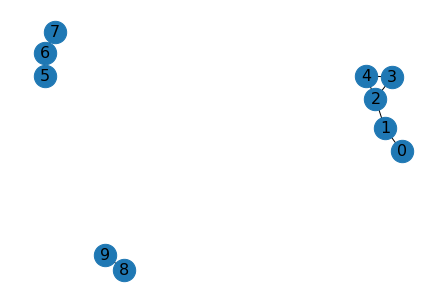

In [5]:
G = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4), (5,6), (6,7), (8,9)])
pos = nx.fruchterman_reingold_layout(G);
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show()

In [11]:
# Listando componentes conectados e ordenando do com mais conexões para o com menos
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
for component in Gcc:
    print(component)

{0, 1, 2, 3, 4}
{5, 6, 7}
{8, 9}


Ordenando em relação à quantidade de componentes, como feito acima, é útil porque a maioria das medidas são definidas apenas para o maior componente.

### Acesso aos vizinhos

Vertices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Vértice selecionado: 3
Vizinhos do vertice selecionado: [0, 1, 2, 7, 12, 13]


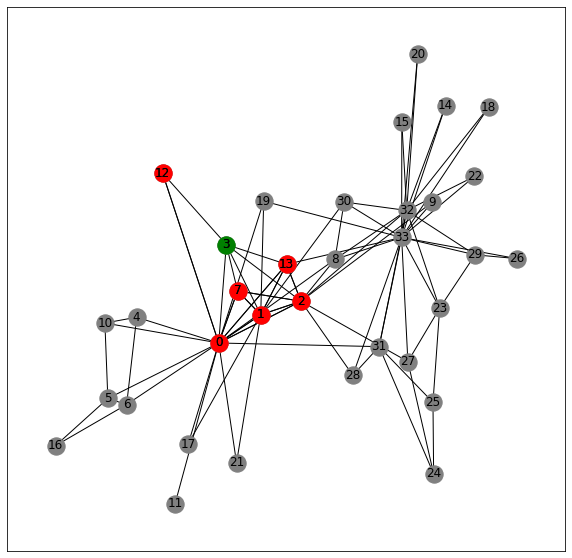

In [14]:
G=nx.karate_club_graph()
print('Vertices:',G.nodes)
node = 3
print('\nVértice selecionado:', node)
print('Vizinhos do vertice selecionado:', list(G.neighbors(node)))

# G.neighbours acessa os vizinhos do vértice node
subset = list(G.neighbors(node)) # a set of nodes
pos = nx.spring_layout(G)
k = G.subgraph(subset) 
nodei = G.subgraph(node)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, node_color = 'gray')
nx.draw_networkx(k, pos=pos, node_color = 'red')
nx.draw_networkx(nodei, pos=pos, node_color = 'green')
plt.show(True)